# CLUSTERING: KMeans


In [22]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [23]:
df = pd.read_csv('/Users/gaetanoantonicchio/Desktop/University/Data Mining - 1/DATAMINING_PROJECT/class_df.csv')

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,0,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,0,...,12,3,0,2,3,3,2,2,2,1
1,20,0,Travel_Frequently,1240,Research & Development,2,4,Life Sciences,4,0,...,13,4,1,1,3,3,1,0,0,0
2,37,0,Travel_Rarely,916,Research & Development,17,2,Life Sciences,4,1,...,13,3,0,10,2,3,3,2,0,2
3,39,0,Travel_Rarely,1354,Research & Development,5,3,Medical,3,1,...,12,4,0,14,3,3,10,10,5,8
4,35,0,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,4,1,...,13,2,1,15,3,3,13,12,5,11


In [25]:
df['TotalSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

In [26]:
features_selected = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]

In [27]:
X = df[features_selected]
X.head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,TotalSatisfaction
0,31,9,7978.000000,2,2,10
1,20,2,2323.000000,1,1,9
2,37,17,3375.000000,10,3,8
3,39,5,3069.000000,14,10,8
4,35,1,8264.307692,15,13,7


In [28]:
# normalize
scaler = RobustScaler()
X = scaler.fit_transform(X)

### Find optimal k

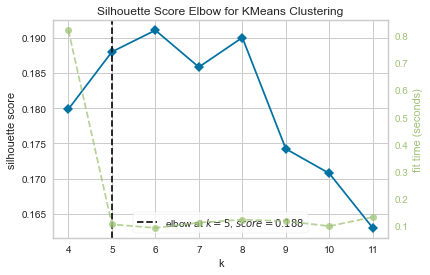

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [30]:
for k in range(4,13):
    model = KMeans(n_clusters=k, max_iter=1000)
    model.fit(X)
    print(f'K = {k} | SSE: {model.inertia_} | Silohuette: {silhouette_score(X, model.labels_)}')

K = 4 | SSE: 1147.4320756291545 | Silohuette: 0.18138645087380909
K = 5 | SSE: 1020.6922366736604 | Silohuette: 0.19450997749954627
K = 6 | SSE: 935.1188180746054 | Silohuette: 0.19316157795471822
K = 7 | SSE: 861.5964479400274 | Silohuette: 0.1861068948442806
K = 8 | SSE: 805.1301992000764 | Silohuette: 0.189839317329604
K = 9 | SSE: 761.956986522164 | Silohuette: 0.17787603473385583
K = 10 | SSE: 733.0510560561061 | Silohuette: 0.16727790544345822
K = 11 | SSE: 709.946579332633 | Silohuette: 0.1594568780971397
K = 12 | SSE: 690.0791065660217 | Silohuette: 0.16358840589042575


In [31]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=5)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(3,random_state=42)

pca.fit(X)
pca_proj = pca.transform(X)

In [33]:
pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2','pca3'])
pca_proj['cluster'] = kmeans.labels_
pca_proj.head()

,pca1,pca2,pca3,cluster
0,-0.676379,1.392263,-0.749697,1
1,-2.567063,0.342930,-0.684335,1
2,-0.525759,-0.929982,0.214567,3
3,0.347593,-1.125077,-0.166905,4
4,1.430663,0.464635,0.355078,2


### Visualize Clusters

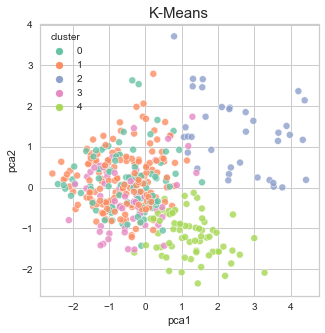

In [34]:
# plot scatter of PCA
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='cluster',
    data=pca_proj,
    legend="full",
    alpha=0.8,
    palette="Set2"
)
plt.title("K-Means", fontsize= 15)
plt.show()

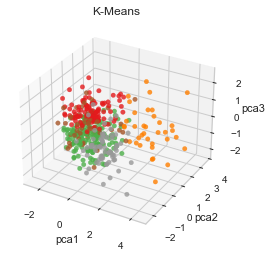

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection = '3d')

x = pca_proj['pca1']
y = pca_proj['pca2']
z = pca_proj['pca3']
c = pca_proj['cluster']

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")

scatter = ax.scatter(x, y, z, c=c, cmap='Set1', alpha=0.8)
ax.set_title('K-Means')
plt.show()
 


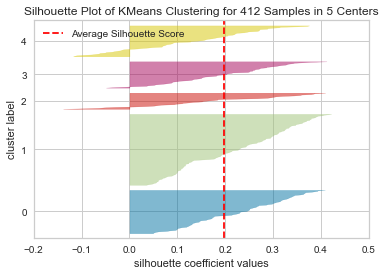

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 412 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
# plot silhouette
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [37]:
X = pd.DataFrame(X, columns=features_selected)
X['clusters'] = kmeans.labels_

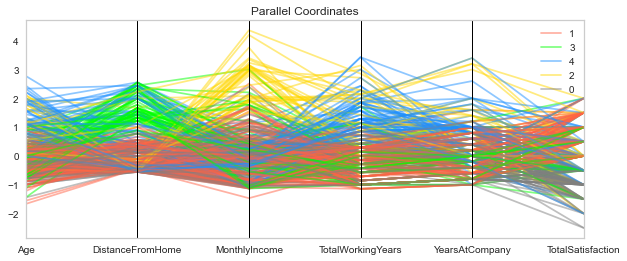

In [38]:
plt.figure(figsize=(10,4))
plt.title('Parallel Coordinates')
pd.plotting.parallel_coordinates(X, "clusters", color= ["tomato", "lime", "dodgerblue", "gold", "grey"], alpha=0.5);

In [39]:
X['Attrition'] = df['Attrition']

<AxesSubplot:xlabel='clusters', ylabel='count'>

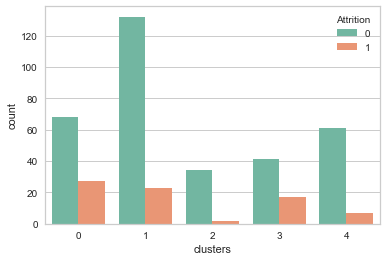

In [40]:
sns.countplot(x="clusters", hue="Attrition", data=X, palette="Set2")